In [1]:
import os
import numpy as np
import pandas as pd
import hickle

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline


# Set working directory
DATA_DIR = 'C:/Users/thoma/Documents/00GitHub/rbc_cnn/'
# Set image directory which is off of GitHub
IMG_DIR = 'C:/Users/thoma/Documents/00GitHub/00_LOCAL_ONLY/Cellavision_Trial_images/Test3_AltFebruary/'


# Not sure what this pickle is
df = pd.read_pickle(DATA_DIR + 'notebooks/classifications.df.pkl')


# {1L: 'Normal', 2L: 'Abnormal'}
label_index = pd.read_csv(DATA_DIR + 'notebooks/label_index.csv')
label_index.reset_index()
classdict = {k:v for __, (k,v) in label_index.iterrows()}

data = df.reset_index()
data = data.rename(columns={'index': 'event'})


def get_image(n):
    return Image.open(IMG_DIR + 'rbcs/{}'.format(n))

def thumb(n):
	try:
		return Image.open(IMG_DIR + 'rbcs/{}'.format(n))
	except:
		return Image.open(IMG_DIR + 'mosaic/images/Normal/{}.png'.format(n))

In [2]:
# http://stackoverflow.com/questions/15514593/importerror-no-module-named-when-trying-to-run-python-script

import sys
sys.path.append('C:/Anaconda/Lib/site-packages')

import cv2
import PIL

# 2843 TOTAL CELLS

In [3]:
# Set DATA directory
CSV_DIR = 'C:/Users/thoma/Documents/00GitHub/rbc_cnn/csv/'
path =r'C:\Users\thoma\Documents\00GitHub\rbc_cnn\csv' # use your path

def csv_to_dataFrame(path):
    
    # output csv
    #fout=open(outputFile,"a")
    i = 0 

    for root, dirs, files in os.walk(path):
        frame = pd.DataFrame()
        list_ = []
        for file_ in files:
            csv_path = os.path.join(root, file_)
            df = pd.read_csv(csv_path,index_col=0, header=0)
            list_.append(df)
        frame = pd.concat(list_)
    frame = frame.reset_index(drop=True)
    return frame


In [4]:
df = csv_to_dataFrame(CSV_DIR)
df.head()

,annotator,image,label,pk,x,y
0,tommy,Ecchinos.jpg,Echinocyte,2591,254,1167
1,tommy,Ecchinos.jpg,Echinocyte,2592,686,978
2,tommy,Ecchinos.jpg,Echinocyte,2593,781,985
3,tommy,Ecchinos.jpg,Echinocyte,2594,741,815
4,tommy,Ecchinos.jpg,Echinocyte,2595,415,858


In [5]:
len(df)

2843

In [6]:
test = df.ix[0]
test

annotator           tommy
image        Ecchinos.jpg
label          Echinocyte
pk                   2591
x                     254
y                    1167
Name: 0, dtype: object

In [11]:
df['annotator'].value_counts()

rick     1864
tommy     978
root        1
Name: annotator, dtype: int64

In [33]:
cell = df.ix[0]
cell.x

254

In [36]:
if cell.x in range(df.ix[1].x-30, df.ix[1].x+30):
    print True
else:
    print False

False


In [37]:
"remove double labeled cells"
i = 0
for1 = 0
for2 = 0
missedByY = 0

for n in range(len(df)):
    start = time.time()

    cell = df.ix[n]
    for1 += 1

    # compare cell to at each "second_cell" in df 
    for s in range(len(df)):

        second_cell = df.ix[s]
        for2 += 1

        # if annotators are same; ignore
        if cell.annotator == second_cell.annotator:
            continue
        else:
            # if smear images are not same; ignore
            if cell.image != second_cell.image:
                continue

            # if x is within range of other cell
            elif cell.x in range(second_cell.x-30, second_cell.x+30):
                # and y is within range of other cell
                # same annotator, same image, similar coordinates
                if cell.y in range(second_cell.y-30, second_cell.y+30):
                    i +=1
                    print "{} overlapping cells".format(i)
                else:
                    continue
            else:
                continue
 

NameError: name 'time' is not defined

In [36]:
# Alter the original csv file so you can get the new XY
# Start by loading in the new csv to dataframe

# csvFile = DATA_DIR + 'dataset.csv'
# classes = pd.read_csv(csvFile, index_col=0, parse_dates=True)
# read in cell labels from Cell Label Tool 
classes = pd.read_csv(CSV_DIR + 'dataset.csv', index_col=0, parse_dates=True)

#alt_february_files = pd.read_csv(DATA_DIR + 'alt_february_files.csv', index_col=0, parse_dates=True)
classes.head()

,annotator,image,label,pk,x,y
0,rick,752602451HV_001.jpg,NORMAL,11,1602,664
1,rick,752602451HV_001.jpg,NORMAL,12,1642,597
2,rick,752602451HV_001.jpg,NORMAL,13,1664,652
3,rick,752602451HV_001.jpg,NORMAL,15,1551,728
4,rick,752602451HV_001.jpg,NORMAL,16,1551,679


In [4]:
# get rid of reject cells
classes = classes[classes.label != 'Reject']
classes = classes[classes.label != 'Abnormal']
len(classes)

2218

In [6]:
# counts the number of cells in each calss
classes['label'].value_counts()

NORMAL         714
Target cell    702
Schistocyte    253
Echinocyte     185
Spherocyte     100
Dacrocyte       71
Stomatocyte     68
Acanthocyte     67
Elliptocyte     58
Name: label, dtype: int64

In [19]:
len(classes)

2218

In [17]:
cell = classes.ix[264]
im = cv2.imread("C:/Users/thoma/Documents/00GitHub/00_LOCAL_ONLY/00RbcCNN_Sln_Images/752900362HV_001.jpg")
cell

annotator                   rick
image        752900362HV_001.jpg
label                Target cell
pk                           320
x                            672
y                           1652
Name: 264, dtype: object

In [18]:
cell.y

1652

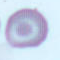

In [19]:
new_x = cell.x - 30
new_y = cell.y - 30
new_w = 60
new_h = 60

croppedCell = im[new_y:new_y+new_h, new_x:new_x+new_w]
pic = Image.fromarray(croppedCell)
pic

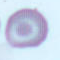

In [20]:
new_x = cell.x - 30
new_y = cell.y - 30
new_w = 60
new_h = 60

croppedCell2 = im[new_y:new_y+new_h, new_x:new_x+new_w]
pic = Image.fromarray(croppedCell2)
pic

In [11]:
croppedCell.shape

(60L, 60L, 3L)

In [21]:
# gets byte array from smear image using xywh coordinates 
def getData(ind, dataframe, im):
    # im = cv2.imread(IMG_DIR + dataframe.image[ind])
    df = dataframe.ix[ind]
    label = df.label
    
    new_x = df.x - 30
    new_y = df.y - 30
    new_w = 60
    new_h = 60

    croppedCell = im[new_y:new_y+new_h, new_x:new_x+new_w]

    if croppedCell.shape == (60, 60, 3):
        return croppedCell, label
    

In [22]:
# get array data from smear with label
# n = total number of cells 

def CreateLabelImageArrays(dataframe):
    
    # chunking counter
    i = 0
    
    # byte array
    X = []
    # label array
    Y = []
    # not sure
    IDs = []
    
    # iterates over image column of dataframe
    for n in dataframe.image.iteritems():
        
        # this is the entire index object
        index_obj = dataframe.ix[n[0]]
        
        # n[0] = index
        index = n[0]

        # get smear image array      
        im = cv2.imread(IMG_DIR + dataframe.image[index])

        try:
            # pass index, dataframe, and image array to function
            x, y = getData(index, dataframe, im)
        except Exception, e:
            #type, value, tb = sys.exc_info()
            #traceback.print_exc()
            print e
            continue

        X.append(x)
        Y.append(y)
        IDs.append(n)
        
        i += 1
        
        if i > 999:
            
            # individual cell byte arrays    
            X = np.array(X)

            # individual cell labels
            Y = np.array(Y)

            # individual cell associated smear files
            IDs = np.array(IDs)

            # create dictionary for arrays
            d = {}
            d['X'] = totalByteArray
            d['y'] = totalLabelArray
            
            # hickle counter
            hickleCount = 0
            
            # (X, Y) -- ((N,3,w,h), label)
            hickle.dump(d, open('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April{}.hkl'.format(hickleCount),'w'))
            
            hickleCount += 1
            i = 0

In [83]:
# Get image arrays for test3 dataset
#test3_image_arrays = CreateLabelImageArrays(classes)

In [ ]:
pic = Image.fromarray(test3_image_arrays[0][4])
pic

In [23]:
test = {}
hickleCount = 8
for x in range(hickleCount):
    test["hk{}".format(x)] = hickle.load('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April{}.hkl'.format(x))

In [24]:
# join cell byte arrays 
totalByteArray = np.concatenate((test['hk0']['X'], test['hk1']['X'], test['hk2']['X'], 
                                 test['hk3']['X'], test['hk4']['X'], test['hk5']['X'], 
                                 test['hk6']['X'], test['hk7']['X']))

# join cell label arrays
totalLabelArray = np.concatenate((test['hk0']['y'], test['hk1']['y'], test['hk2']['y'], 
                                 test['hk3']['y'], test['hk4']['y'], test['hk5']['y'], 
                                 test['hk6']['y'], test['hk7']['y']))


In [26]:
# create dictionary for arrays
d = {}
d['X'] = totalByteArray
d['y'] = totalLabelArray

In [41]:
len(totalByteArray)

18060

In [27]:
# (X, Y) -- ((N,3,w,h), label)
hickle.dump(d, open('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/TotalHickle.hkl','w'))

In [92]:
hk = hickle.load('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April2.hkl')

In [97]:
len(hk['X'])

2829

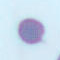

In [95]:
pic = Image.fromarray(hk['X'][309])
pic


In [96]:
hk['y'][309]

'Spherocyte'